<a href="https://colab.research.google.com/github/keerththansana/attrition-analysis/blob/main/Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis

## Overview

Attrition, in Human Resource terminology, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to predict employee attrition and identify influtial factors to reduce employee attrition.

The original data is from IBM HR Analytics Employee Attrition & Performance

In [1]:
import pandas as pd


First loads IBM's HR data from an online CSV file into a pandas DataFrame. It then removes several unnecessary columns such as salary, job role, and years of experience that aren't needed for further analysis. After cleaning the data by dropping these columns, the code displays the first three rows of the remaining data, allowing us to preview the relevant employee information, like age, gender, and job satisfaction, that will be used for analysis.

In [2]:
IBM_Attrition = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
IBM_Attrition = IBM_Attrition.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole','Department','JobRole','Education','PercentSalaryHike'], axis=1)
IBM_Attrition.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,2,4,Single,5993,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,2,Married,5130,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,1,3,Single,2090,6,Yes,3,2,0,3,3,0,0


In [3]:
IBM_Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

The IBM_Attrition.columns command is used to display the names of all the columns in the IBM_Attrition DataFrame. This allows us to see the different attributes (such as 'Age', 'Gender', 'Attrition', etc.) that are available in the dataset. These columns represent various characteristics of the employees, and by looking at the column names, we can get an overview of the data and decide which features to analyze or use in modeling.



In [4]:
#There is no NaN values in the dataset
print(pd.isnull(IBM_Attrition).sum())

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64


In [5]:
#mapping non-numeric values to numeric values
IBM_Attrition_Nu = IBM_Attrition.copy()
YN_mapping = {"Yes": 1, "No": 0}
IBM_Attrition_Nu['Attrition'] = IBM_Attrition_Nu['Attrition'].map(YN_mapping)
IBM_Attrition_Nu['OverTime'] = IBM_Attrition_Nu['OverTime'].map(YN_mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
IBM_Attrition_Nu['BusinessTravel'] = IBM_Attrition_Nu['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
IBM_Attrition_Nu['Gender'] = IBM_Attrition_Nu['Gender'].map(Gender_mapping)
Marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
IBM_Attrition_Nu['MaritalStatus'] = IBM_Attrition_Nu['MaritalStatus'].map(Marital_mapping)

IBM_Attrition_Nu.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,0,1,2,1,3,2,4,0,5993,8,1,3,1,0,0,1,6,0
1,49,0,1,8,3,0,2,2,2,1,5130,1,0,4,4,1,3,3,10,1
2,37,1,0,2,4,0,2,1,3,0,2090,6,1,3,2,0,3,3,0,0


In this code, we're changing words into numbers to make it easier for a computer to understand the data.

- **Attrition & OverTime**: If someone left the company (Attrition) or worked overtime (OverTime), we mark it as '1' for 'Yes' and '0' for 'No'.
- **BusinessTravel**: For how often someone travels for work, we mark 'Travel_Frequently' as '1' and others like 'Travel_Rarely' or 'Non-Travel' as '0'.
- **Gender**: We change 'Female' to '1' and 'Male' to '0'.
- **MaritalStatus**: If someone is 'Married', we mark it as '1', and 'Single' or 'Divorced' as '0'.

This makes all the information numbers, so the computer can easily work with it.

# EDA

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

print("Seaborn and Matplotlib imported successfully!")


Seaborn and Matplotlib imported successfully!


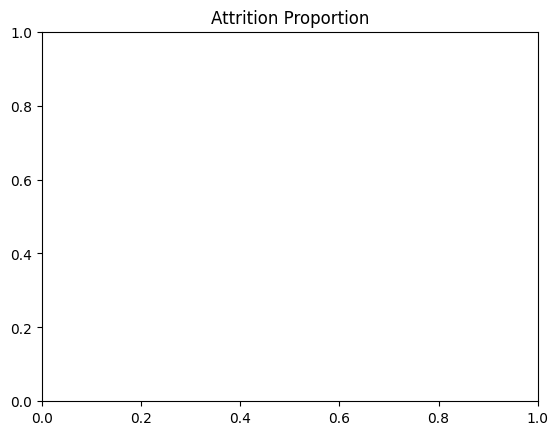

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Load the dataset within the same cell
IBM_Attrition = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
IBM_Attrition = IBM_Attrition.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole','Department','JobRole','Education','PercentSalaryHike'], axis=1)


Y_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'Yes'])
N_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Create the pie chart
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')

# Add the circle to the plot
p=plt.gcf()
p.gca().add_artist(my_circle)

# Set the title
ax = plt.axes()
ax.set_title("Attrition Proportion")

# Display the chart
plt.show()

In this code, we are visualizing the proportion of employees who left the company (Attrition) versus those who stayed.

1. **Counting 'Yes' and 'No'**: It counts how many employees left (Yes) and how many stayed (No) based on the 'Attrition' column.
2. **Creating the Pie Chart**:
   - A pie chart is drawn to represent the proportion of employees who left vs stayed.
   - The chart is given two colors: 'lightcoral' for those who left and 'cornflowerblue' for those who stayed.
3. **Adding a Circle**: A white circle is placed in the middle to create a donut shape.
4. **Title**: The chart is given the title "Attrition Proportion".

### Output:
The result is a donut-shaped pie chart, where the size of each section shows how many employees left ('Yes') and how many stayed ('No'). The chart helps to quickly see the proportion of employees who stayed versus those who left.

### Purpose:
This chart makes it easier to visually understand the distribution of employee attrition (who left and who stayed) in the company. It's a helpful tool for HR or management to analyze employee turnover.

   Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0   41                 1                        2               3         2   
1   49                 8                        3               2         2   
2   37                 2                        4               2         1   
3   33                 3                        4               3         1   
4   27                 2                        1               3         1   

   JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PerformanceRating  \
0                4           5993                   8                  3   
1                2           5130                   1                  4   
2                3           2090                   6                  3   
3                3           2909                   1                  3   
4                2           3468                   9                  3   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear

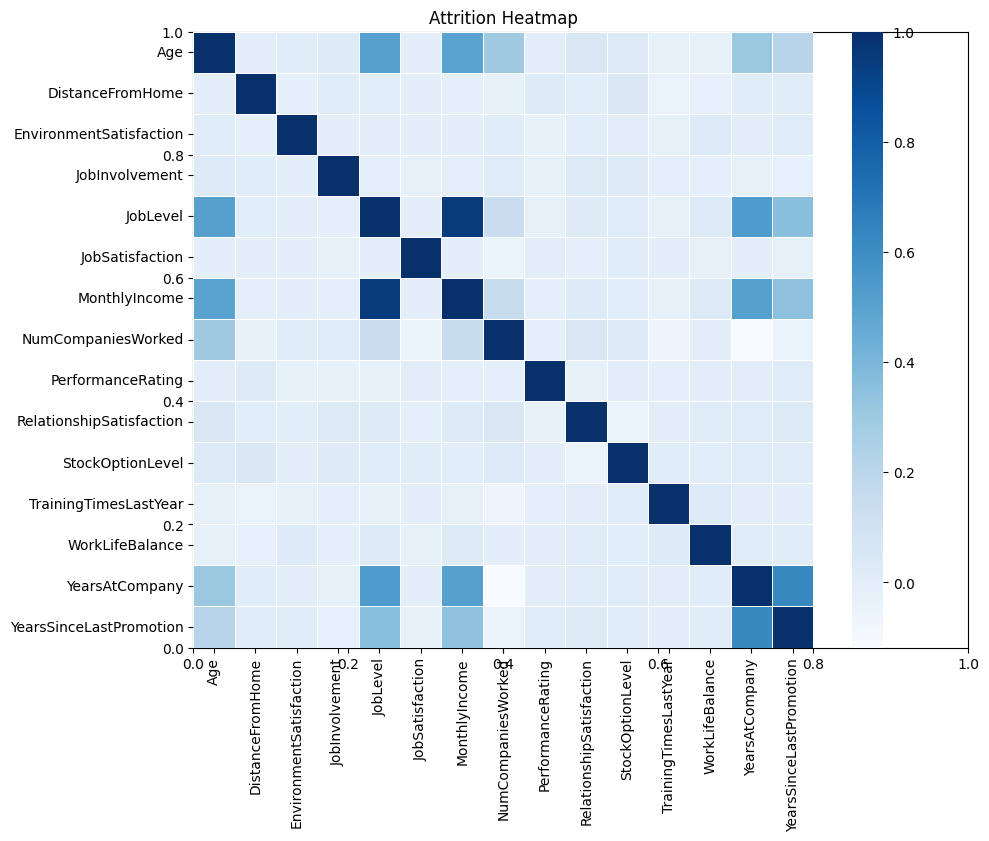

In [9]:

# Select only numeric columns for correlation
IBM_Attrition_Nu = IBM_Attrition.select_dtypes(include=['int64', 'float64'])

# Check if the numeric DataFrame is created
print(IBM_Attrition_Nu.head())

# Set up the figure size
plt.subplots(figsize=(10, 8))

# Create axis and set title
ax = plt.axes()
ax.set_title("Attrition Heatmap")

# Calculate the correlation matrix
corr = IBM_Attrition_Nu.corr()

# Plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Blues",
            linewidths=0.5)

# Display the plot
plt.show()



This code selects only the numeric columns from the dataset, such as 'Age', 'DistanceFromHome', and 'YearsAtCompany', and calculates the correlation between them. It then creates a heatmap to visualize these correlations, where the intensity of the color (shades of blue) represents the strength of the relationship between two variables. Darker blue indicates a stronger correlation, while lighter blue shows a weaker one. The heatmap is displayed with a title "Attrition Heatmap" and helps to easily identify which numeric factors are closely related. This analysis is useful for spotting patterns and understanding how different employee characteristics may be connected.

# Objective Factors

In [10]:
Age_YAC_NCW = IBM_Attrition[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

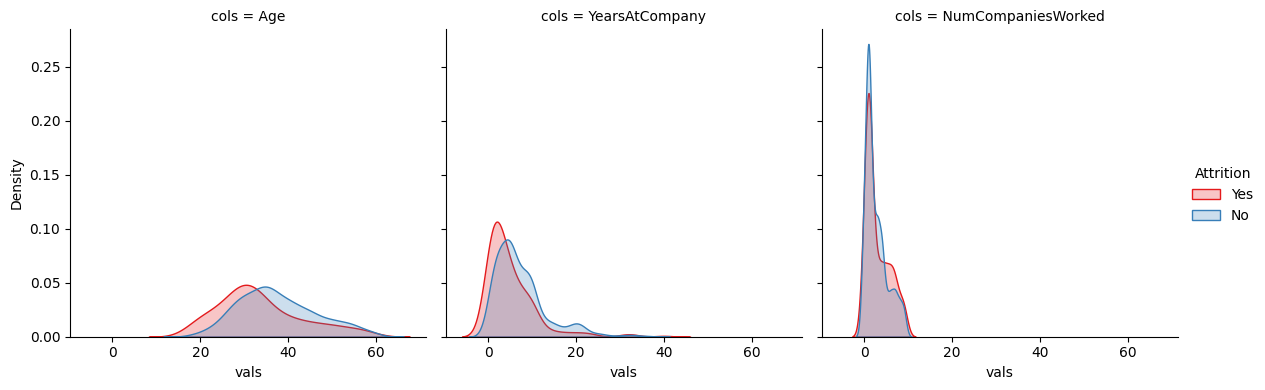

In [12]:
# Replace 'size' with 'height'
g = sns.FacetGrid(AYN_melt, col='cols', hue='Attrition', palette='Set1', height=4)

# Use sns.kdeplot instead of sns.distplot
g = (g.map(sns.kdeplot, 'vals', fill=True).add_legend())

# Display the plot
plt.show()

#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture..
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

The data related to 'Age', 'YearsAtCompany', 'NumCompaniesWorked', and 'Attrition' are selected from the dataset and reshaped into a format suitable for plotting. Then, a FacetGrid is created to visualize the distribution of these features based on employee attrition (whether they left the company or not). Instead of using a bar plot, a Kernel Density Estimate (KDE) plot is used, which shows the smooth distribution of values. The graph highlights the attrition trends, showing that younger employees or those with shorter job tenures tend to leave the company more often. Additionally, employees who have worked in more than five companies also have higher attrition, indicating a pattern where the average time spent at each company is shorter. This analysis provides valuable insights for HR to understand potential factors influencing employee turnover.

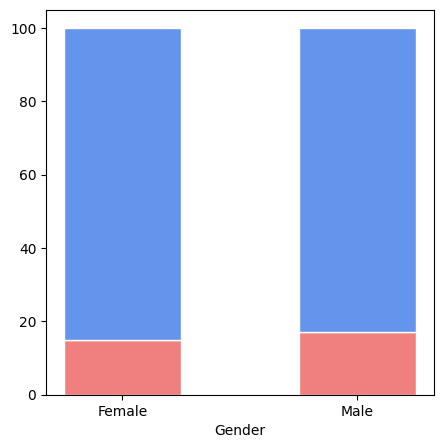

In [13]:
# Data
r = [0,1]
Y_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Female')])
N_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Female')])
Y_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Male')])
N_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")

# Show graphic
plt.show()

# Return and Bonus

In [14]:
Income = IBM_Attrition[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')

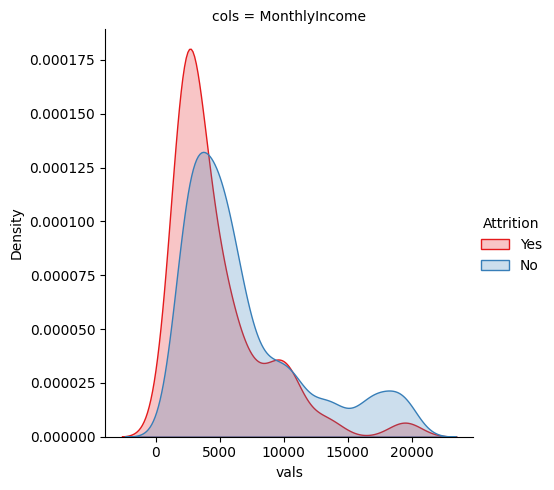

In [16]:
# Replace 'size' with 'height' and use 'sns.kdeplot' instead of 'sns.distplot'
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1", height=5)

# Use sns.kdeplot for the KDE plot with shading
g = (g.map(sns.kdeplot, "vals", fill=True).add_legend())

# Display the plot
plt.show()

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

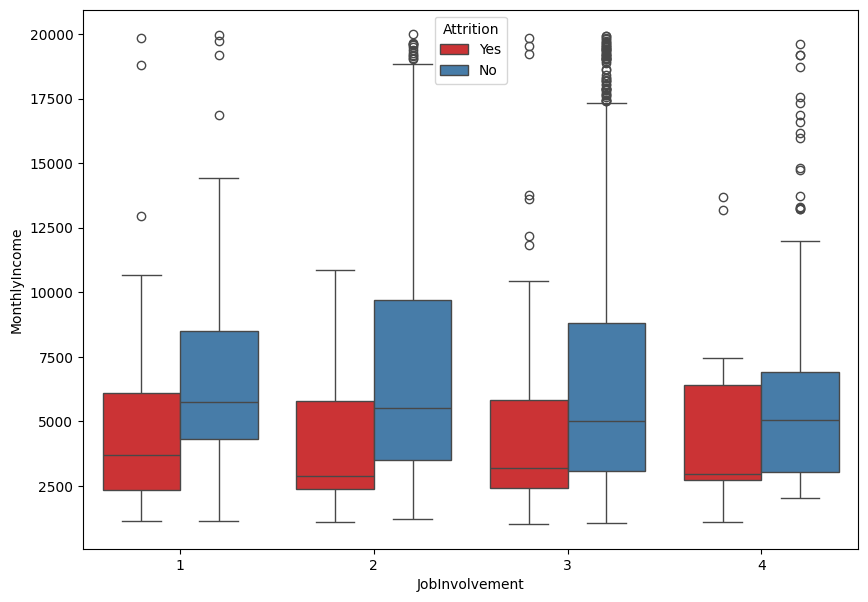

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=IBM_Attrition, palette="Set1")
##Interesting Finding: Low income together with similar involvement is the reason behind attrition

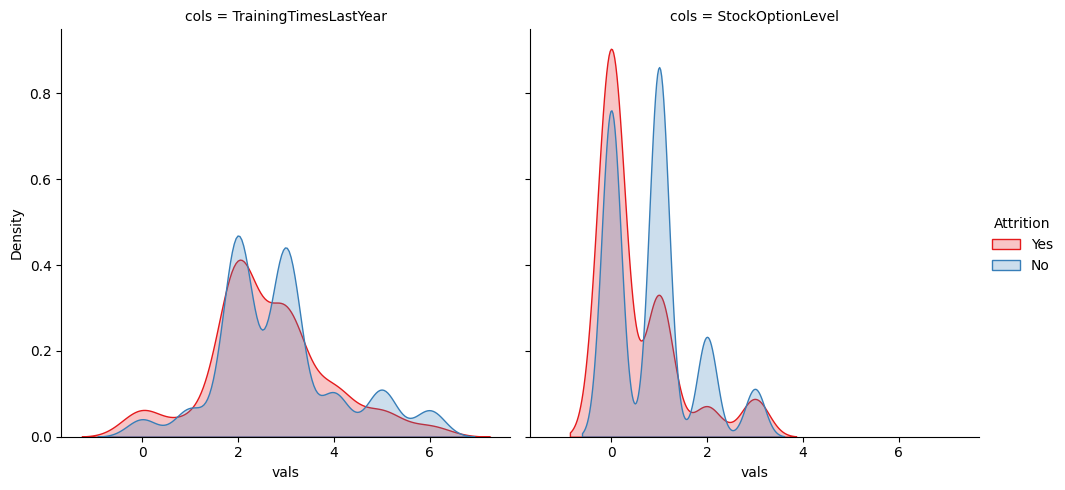

In [19]:
# Preparing data
TS = IBM_Attrition[['TrainingTimesLastYear', 'StockOptionLevel', 'Attrition']]
TS_melt = TS.melt(['Attrition'], var_name='cols', value_name='vals')

# Plotting
g = sns.FacetGrid(TS_melt, col='cols', hue='Attrition', palette='Set1', height=5)
g = g.map(sns.kdeplot, 'vals', fill=True).add_legend()

# Display plot
plt.show()

# Satisfaction

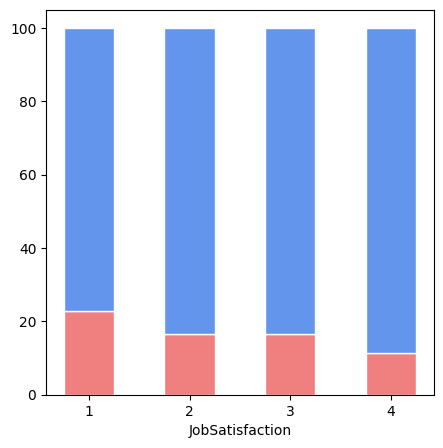

In [20]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")

# Show graphic
plt.show()

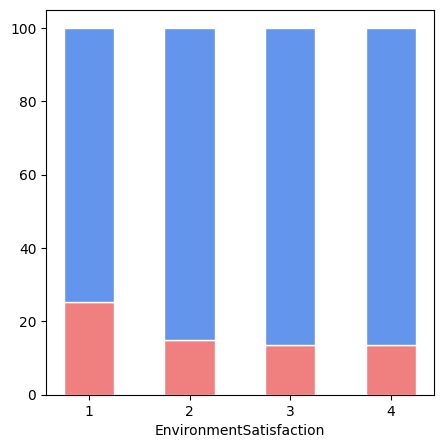

In [21]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")

# Show graphic
plt.show()

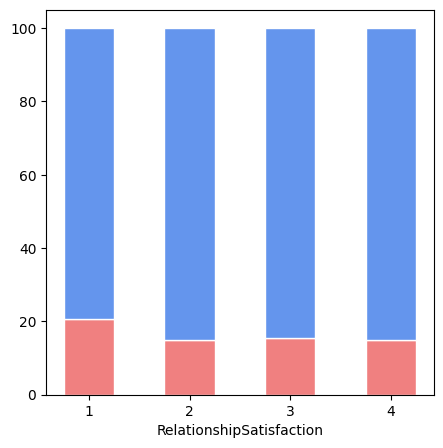

In [22]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("RelationshipSatisfaction")

# Show graphic
plt.show()

# Model

In [24]:
from sklearn.model_selection import train_test_split

# Ensure 'Attrition' is in the dataset and numerical
if 'Attrition' in IBM_Attrition_Nu.columns:
    predictors = IBM_Attrition_Nu.drop(['Attrition'], axis=1)
    target = IBM_Attrition_Nu['Attrition']

    # Splitting the dataset
    x_train, x_val, y_train, y_val = train_test_split(
        predictors, target,
        test_size=0.22,
        random_state=0
    )

    print(f"Training set size: {x_train.shape}, Validation set size: {x_val.shape}")
else:
    print("'Attrition' column is missing from IBM_Attrition_Nu.")


'Attrition' column is missing from IBM_Attrition_Nu.


In [25]:
# If you have the original IBM_Attrition DataFrame
IBM_Attrition_Nu['Attrition'] = IBM_Attrition['Attrition']


In [26]:
if 'Attrition' in IBM_Attrition_Nu.columns:
    predictors = IBM_Attrition_Nu.drop(['Attrition'], axis=1)
    target = IBM_Attrition_Nu['Attrition']

    x_train, x_val, y_train, y_val = train_test_split(
        predictors, target,
        test_size=0.22,
        random_state=0
    )

    print(f"Training set size: {x_train.shape}, Validation set size: {x_val.shape}")
else:
    print("'Attrition' column is still missing.")


Training set size: (1146, 15), Validation set size: (324, 15)


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.95


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.88


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       271
         Yes       0.67      0.15      0.25        53

    accuracy                           0.85       324
   macro avg       0.76      0.57      0.58       324
weighted avg       0.82      0.85      0.81       324



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


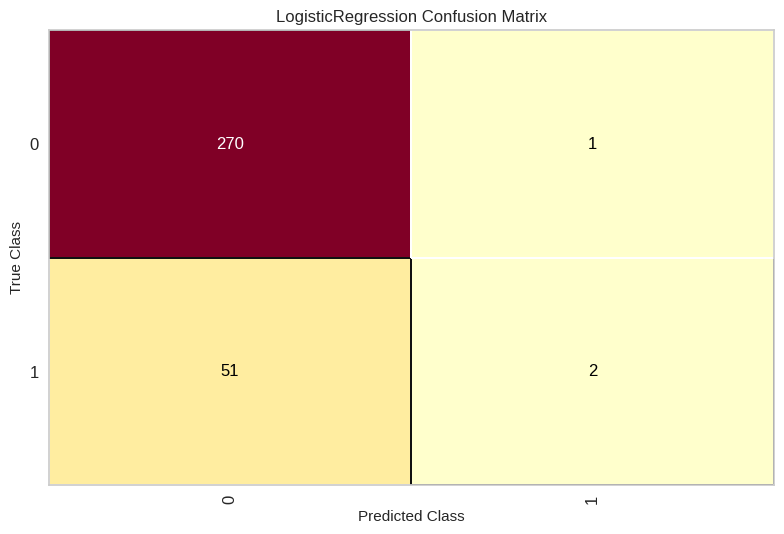

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(logreg, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_val, y_val)

# How did we do?
cm.poof()

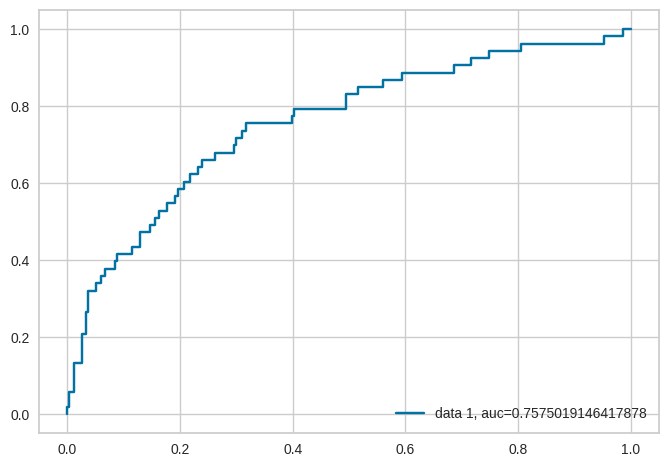

In [34]:
# Convert 'Yes'/'No' to 1/0
y_val_binary = y_val.map({'Yes': 1, 'No': 0})
y_pred_binary = logreg.predict(x_val)

# Now calculate the ROC curve and AUC
y_pred_proba = logreg.predict_proba(x_val)[:, 1]  # Probabilities for class '1'
fpr, tpr, _ = metrics.roc_curve(y_val_binary, y_pred_proba)
auc = metrics.roc_auc_score(y_val_binary, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()


In [35]:
import numpy as np
coef = np.squeeze(abs(logreg.coef_)).tolist()

<ipython-input-36-c8c221a8795d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h',palette=sns.cubehelix_palette(8,reverse=True))
<ipython-input-36-c8c221a8795d>:7: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h',palette=sns.cubehelix_palette(8,reverse=True))
<ipython-input-36-c8c221a8795d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


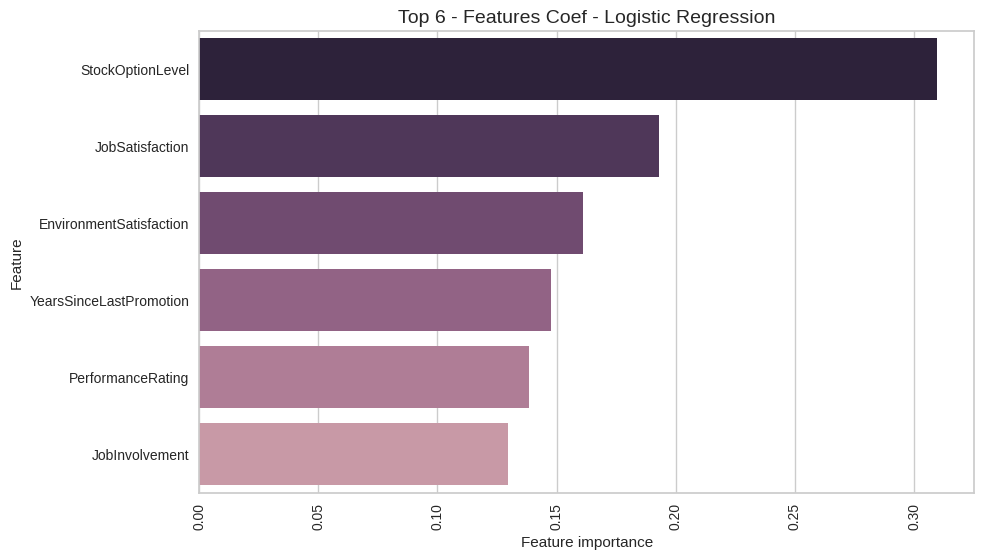

In [36]:
%matplotlib inline

tmp = pd.DataFrame({'Feature': list(x_train), 'Feature importance': coef})
tmp = tmp.sort_values(by='Feature importance',ascending=False).head(6)
plt.figure(figsize = (10,6))
plt.title('Top 6 - Features Coef - Logistic Regression',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h',palette=sns.cubehelix_palette(8,reverse=True))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Conclusion

## Based on the influtial factors analysis

*   Don't make them work overtime, they do care!

*   Communicate the vision

*   Increase employee engagement, especially young employees

*   Enhance recognition and rewards programs - Stock option can be a good choice

*   Create a pleasant workspace and increase satisfaction

## Since the model still need improvement in predicting attrition...
A **stay interview** is a conversation with employees who are currently working at your company, where you ask questions to understand what they need to feel happy and stay longer. For example, you might ask, "What kind of feedback or recognition would you like about your performance that you aren’t getting right now?"

On the other hand, a **survey or interview with employees who decided to leave** is done to understand why they chose to leave the company. By asking them about their experiences and what they cared about, you can identify the factors that might help improve employee retention in the future.